In [1]:
import pandas as pd 
import numpy as np 
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs 
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

### Given the raw EEG csv loaded as a pandas dataframe, perform basic preprocessing and return epochs in shape (10, 16, 1000) ###
def preprocess(block, sfreq = 125):
    eeg_data = block.iloc[:, 1:17].to_numpy().T * 1e-6
    eeg_data = eeg_data[:,625:13125]
    eeg_data = np.array(np.split(eeg_data,10,axis=-1))
    filtered = bandpass_filter(eeg_data, 0.5, 40, sfreq)
    return filtered
def preprocess_data(name,number):
    blocks = []
    for i in range(1,6):
        block = pd.read_csv(f"data/raw/{name}_{i}_{number}.csv", sep = '\t', header=None)
        block = preprocess(block)
        blocks.append(block)
    data = np.concatenate(blocks)
    print(data.shape)
    np.save(f"data/preprocessed/data/{name}_{number}.npy", data)


In [2]:
names = ["onno", "yoyo", "emma"]
num_samples = [8,9,2]
for name, num in zip(names,num_samples):
    for i in range(1,num+1):
        preprocess_data(name,i)

(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)
(50, 16, 1250)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_eeg_channels(eeg_sample):
    num_channels = eeg_sample.shape[0]
    fig, axes = plt.subplots(4, 4, figsize=(15, 10))
    fig.suptitle('EEG Channel Amplitudes Over Time', fontsize=16)

    for i in range(num_channels):
        row = i // 4
        col = i % 4
        axes[row, col].plot(eeg_sample[i])
        axes[row, col].set_title(f'Channel {i+1}')
        axes[row, col].set_xlabel('Time')
        axes[row, col].set_ylabel('Amplitude')
        axes[row, col].tick_params(labelsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
    plt.show()


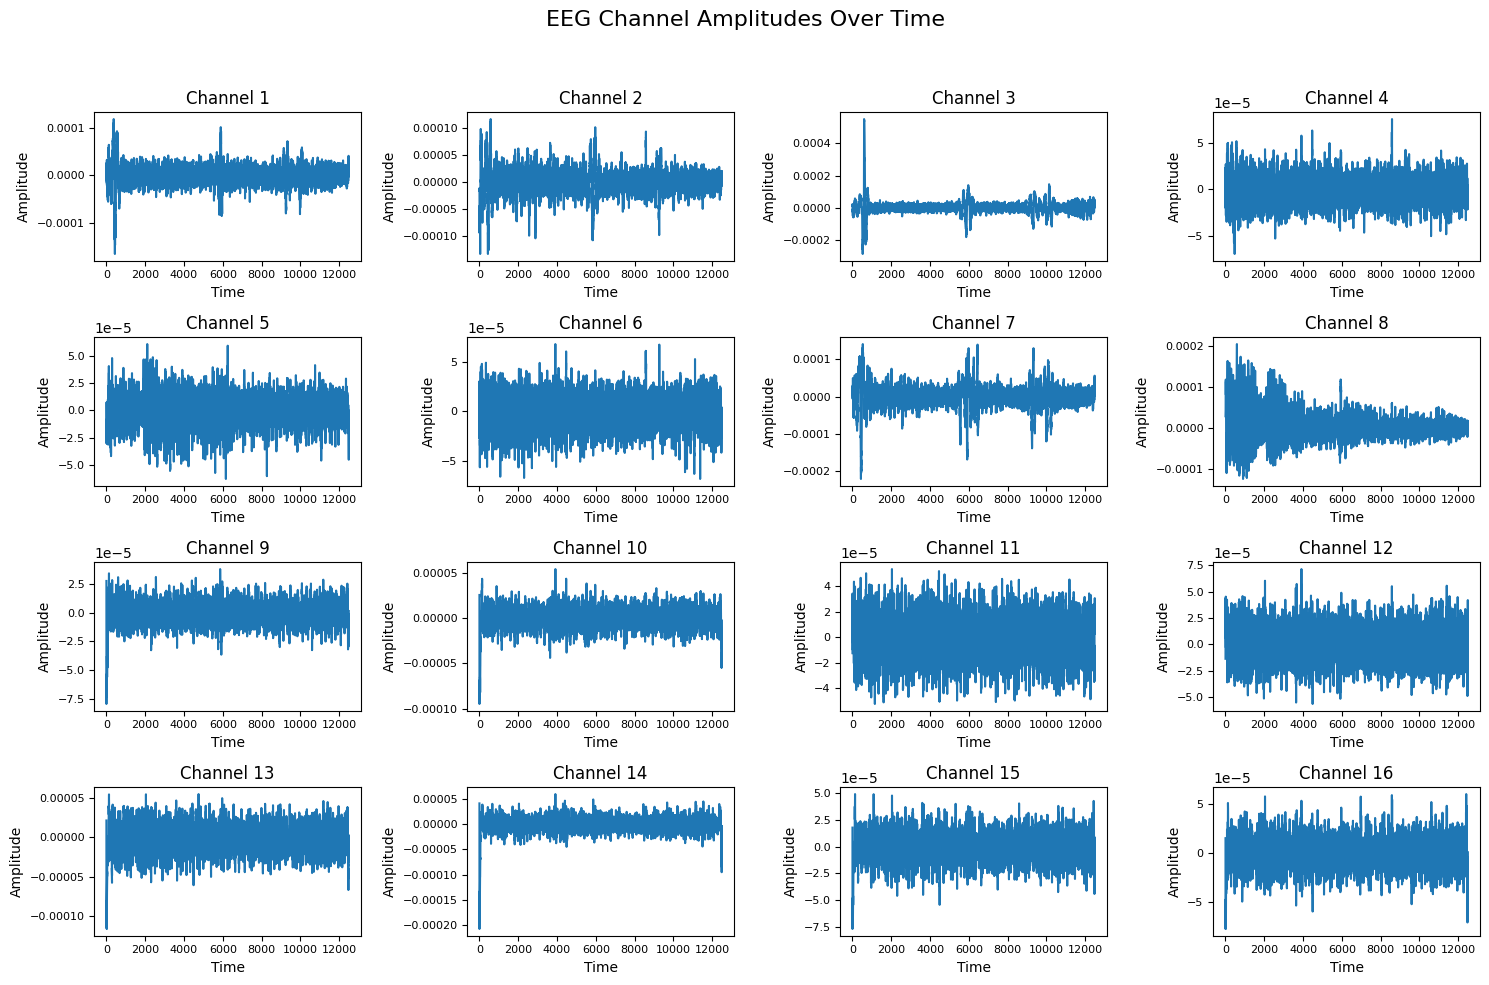

In [4]:
block = pd.read_csv(f"data/raw/yoyo_1_5.csv", sep = '\t', header=None)
eeg_data = block.iloc[:, 1:17].to_numpy().T * 1e-6
eeg_data = eeg_data[:,625:13125]
eeg_data = bandpass_filter(eeg_data, 0.5, 40, 125)
plot_eeg_channels(eeg_data)